In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Getting Dataset

In [4]:
train_dataset = torchvision.datasets.FashionMNIST(root='./data', download= True, train = True, transform = transforms.Compose([transforms.ToTensor()]))
test_dataset = torchvision.datasets.FashionMNIST(root='./data', download= True, train = False, transform = transforms.Compose([transforms.ToTensor()]))

BATCH_SIZE = 128

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

In [13]:
from utils import train_loop, test_loop, EarlyStopper
from pretrained_model import ResNet_pretrained


num_epochs = 60
lr = 0.001
patience = 5

early_stopper = EarlyStopper(patience=patience, min_delta=0)
# Choice between 'resnet18' and 'resnet50'
model = ResNet_pretrained(model_choice='resnet18', train_last_layer_only=False)

model.to(device= device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

tr_acc, te_acc = [], []
tr_loss, te_loss = [], []

best_acc = 0

for epoch in range(num_epochs):
    train_loss, train_correct = train_loop(train_loader, model, loss_fn, optimizer, device)
    test_loss, test_correct = test_loop(test_loader, model, loss_fn, device)

    print('Train Acc epoch {} : {} '.format(epoch, train_correct))
    print('Test Acc epoch {} : {} '.format(epoch, test_correct))

    tr_acc.append(train_correct)
    te_acc.append(test_correct)

    tr_loss.append(train_loss)
    te_loss.append(test_loss)
    
    if early_stopper.early_stop(test_loss):
        print("Done! Early stopped at {}".format(epoch))
        break


Train Acc epoch 0 : 0.8337833333333333 
Test Acc epoch 0 : 0.8651 
Train Acc epoch 1 : 0.8850666666666667 
Test Acc epoch 1 : 0.8818 
Train Acc epoch 2 : 0.9017 
Test Acc epoch 2 : 0.8918 
Train Acc epoch 3 : 0.9126333333333333 
Test Acc epoch 3 : 0.8961 
Train Acc epoch 4 : 0.9212833333333333 
Test Acc epoch 4 : 0.8983 
Train Acc epoch 5 : 0.9279333333333334 
Test Acc epoch 5 : 0.893 
Train Acc epoch 6 : 0.9343 
Test Acc epoch 6 : 0.8927 
Train Acc epoch 7 : 0.9423333333333334 
Test Acc epoch 7 : 0.8985 
Train Acc epoch 8 : 0.9463333333333334 
Test Acc epoch 8 : 0.8973 
Train Acc epoch 9 : 0.9522833333333334 
Test Acc epoch 9 : 0.9014 
Done! Early stopped at 9


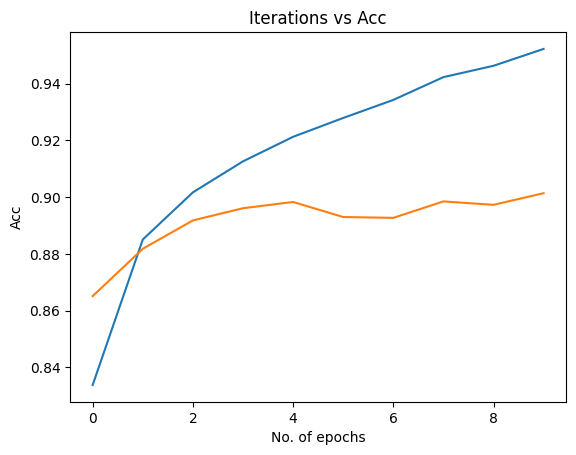

In [14]:
plt.plot(range(epoch+1), tr_acc)
plt.plot(range(epoch+1), te_acc)
plt.xlabel("No. of epochs")
plt.ylabel("Acc")
plt.title("Iterations vs Acc")
plt.show()

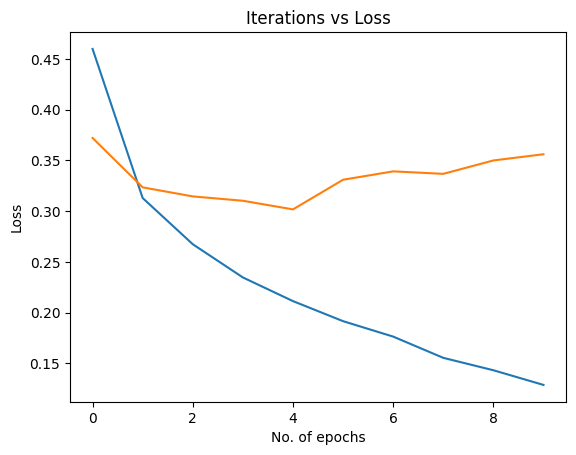

In [15]:
plt.plot(range(epoch+1), tr_loss)
plt.plot(range(epoch+1), te_loss)
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")
plt.show()

In [16]:
print("Best Acc : {} | Best Epoch : {}".format(max(te_acc), te_acc.index(max(te_acc))))

Best Acc : 0.9014 | Best Epoch : 9


## Pickle out results and accuracies

In [17]:
import pickle
import os

file_name = 'pretrained_resnet18_nofreeze.pkl' 

with open(os.getcwd() + '/results/' + file_name, 'wb') as file:
    pickle.dump(tr_acc, file)
    pickle.dump(te_acc, file)
    pickle.dump(tr_loss, file)
    pickle.dump(te_loss, file)

## Pickle in results and accuracies

In [18]:
file_name = 'pretrained_resnet18_nofreeze.pkl' 

with open(os.getcwd() + '/results/' + file_name, 'rb') as file:
    tr_acc = pickle.load(file)
    te_acc = pickle.load(file)
    tr_loss = pickle.load(file)
    te_loss = pickle.load(file)


print(tr_acc)
print(te_acc)
print(tr_loss)
print(te_loss)

[0.8337833333333333, 0.8850666666666667, 0.9017, 0.9126333333333333, 0.9212833333333333, 0.9279333333333334, 0.9343, 0.9423333333333334, 0.9463333333333334, 0.9522833333333334]
[0.8651, 0.8818, 0.8918, 0.8961, 0.8983, 0.893, 0.8927, 0.8985, 0.8973, 0.9014]
[0.45986458471716085, 0.31294944119860113, 0.26745413930050094, 0.23472251214071124, 0.2114040787889759, 0.1916398913907344, 0.17643854118931268, 0.15551596636107481, 0.14329143536529307, 0.12883599131886384]
[0.37213415171526654, 0.3234807887597929, 0.3145611914275568, 0.3102754403518725, 0.3017650201350828, 0.33097258587426776, 0.3392307013273239, 0.33678586422642576, 0.3499789134233813, 0.3560972308056264]
